In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import warnings
#import goproject.data
warnings.filterwarnings('ignore')

# algunas predefinciones

In [2]:
def plot_barrios(barrios_elegidos):
    bsas_map = gpd.read_file('../../gopa_data/barrios-ciudad')
    puntos = gpd.GeoDataFrame(ciudad,
                             geometry = gpd.points_from_xy(ciudad.search_longitude, ciudad.search_latitude))

    fig,ax = plt.subplots(figsize = (10,10))
    bsas_map.plot(ax=ax, color='lightgrey')
    puntos[puntos['BARRIO'].isin(barrios_elegidos)].plot(ax=ax, markersize=5, color='red')
    ax.set_xlim([-58.550, -58.325])
    ax.set_ylim([-34.700, -34.525])
    plt.show()

#  cargamos dataset

In [8]:
ciudad = pd.read_csv('ciudad_barrios.csv')
ciudad.head(3)

,Unnamed: 0,search_longitude,search_latitude,timestamp,leave,arrive,search_method,uid,geometry,BARRIO
0,0,-58.441093,-34.587517,2021-03-06 03:40:51,2021-03-10 23:38:00,2021-03-10 10:38:00,searchInThisArea,IdVRqzjM1OQGXufqTmZIRv2CPhk1,POINT (-58.44109285622836 -34.58751745907739),CHACARITA
1,1,-58.448010,-34.584375,2021-03-29 00:28:46,2021-03-29 01:27:53,2021-03-29 00:27:53,google,NaN,POINT (-58.44800979999999 -34.58437500000001),CHACARITA
2,2,-58.451688,-34.585531,2021-03-16 23:17:52,2021-03-17 00:16:20,2021-03-16 23:16:20,searchInThisArea,NaN,POINT (-58.45168825238943 -34.58553119941662),CHACARITA


In [4]:
ciudad['timestamp'] = pd.to_datetime(ciudad['timestamp'])
ciudad['arrive'] = pd.to_datetime(ciudad['arrive'])
ciudad['leave'] = pd.to_datetime(ciudad['leave'])
ciudad['hour'] = ciudad['arrive'].dt.hour
ciudad['month_number'] = ciudad.arrive.dt.month
ciudad['month_name'] = ciudad.arrive.dt.month_name()
ciudad['weekday'] = ciudad.arrive.dt.weekday
ciudad['weekday_name'] = ciudad.arrive.dt.day_name()

# elijamos un barrio

In [5]:
barrio_elegido = ['PALERMO']
#barrio_elegido = ['PALERMO','BELGRANO'] #también podemos leegir una lista de barrios!

In [6]:
barrio = ciudad[ciudad['BARRIO'].isin(barrio_elegido)]
#reemplazo los días de la semana en inglés
barrio.weekday_name = barrio.weekday_name.map({'Monday': 'lunes', 'Tuesday': 'martes', 'Wednesday': 'miercoles',
 'Thursday': 'jueves', 'Saturday': 'viernes', 'Friday': 'sabado', 'Sunday': 'domingo'})

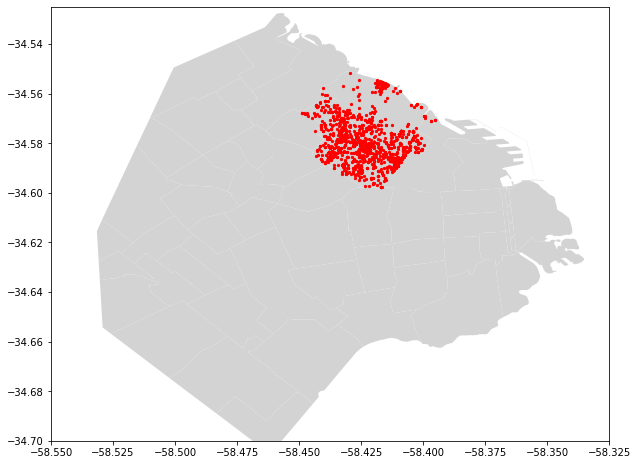

In [7]:
plot_barrios(barrio_elegido)

# Analizamos por día

In [8]:
barrio.head(2)

,Unnamed: 0,search_longitude,search_latitude,timestamp,leave,arrive,search_method,uid,geometry,BARRIO,hour,month_number,month_name,weekday,weekday_name
5499,5499,-58.418288,-34.581668,2021-02-13 15:13:03,2021-02-13 16:12:45,2021-02-13 15:12:45,searchInThisArea,e8itgepSU1YX6Q48HtrDpz76OXr1,POINT (-58.41828804463148 -34.58166840120946),PALERMO,15,2,February,5,viernes
5500,5500,-58.428174,-34.581082,2021-01-02 14:00:04,2021-01-02 15:00:55,2021-01-02 14:00:55,this_area,unauthenticated,POINT (-58.42817399650811 -34.58108154049506),PALERMO,14,1,January,5,viernes


In [11]:
def distribucion_por_dia(df, dia= None):    
    if dia == None:
        return df.hour.value_counts(normalize=True).sort_index()
    
    elif dia.lower() in df.weekday_name.unique():
        cond = df['weekday_name'] == dia
        return df[cond].hour.value_counts(normalize=True).sort_index()
    
    else:
        print('error, día no encontrado')

def agregador(columna, n): #columna a dividir, número de partición
    columna = columna.sort_index()
    valores = [ ( f'{i}-{i+n}' , sum(columna[i:i+n]) ) for i in range(0,24,n) ]
    return pd.DataFrame(valores,columns=['horario','probabilidad']).set_index('horario')

def plotear_dia(df, dia, n):
    data = distribucion_por_dia(df, dia)
    agregado = agregador(data,n) 
    x = agregado.index
    y = agregado.probabilidad
    plt.figure(figsize=(15,6))
    plt.bar(x ,y*100, color = 'lightgreen')
    plt.grid(lw=0.4)
    plt.ylabel('probabilidad', fontdict = {'size':20})
    plt.xlabel('Franja Horaria', fontdict = {'size':20})
    
    if n == 1:
        plt.title(f'Distribución de probabilidad cada 1 hora el día {dia.upper()}:\n{barrio_elegido[0]}', fontdict = {'size':25})
    else:
        plt.title(f'Distribución de probabilidad cada {n} horas el día {dia.upper()}:\n{barrio_elegido[0]}', fontdict = {'size':25})

    
    font = {'family': 'monospace' ,  'color':  'white',
            'size': 10, 'horizontalalignment':'center'}
    for i in range(24//n):
        plt.text(i, #x
                 y[i]*50,
                 f'{round(y[i]*100, 2)}%', 
                 fontdict=font,
                 path_effects=[pe.withStroke(linewidth=2, foreground="black")])

    plt.show()


-----
hora a hora

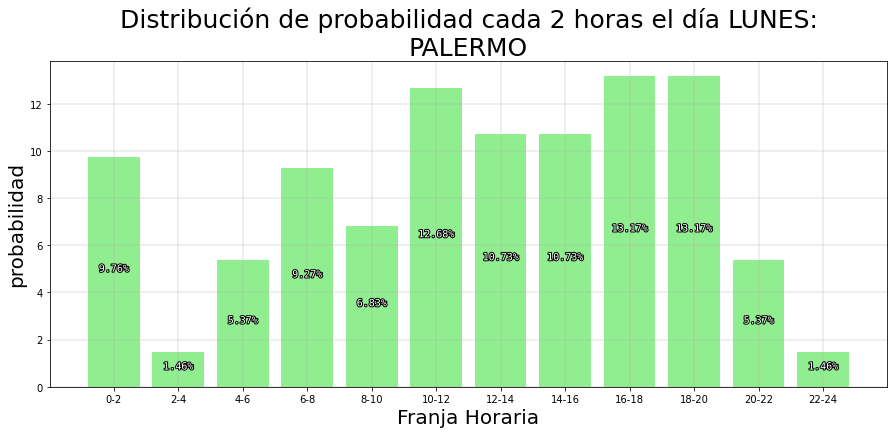

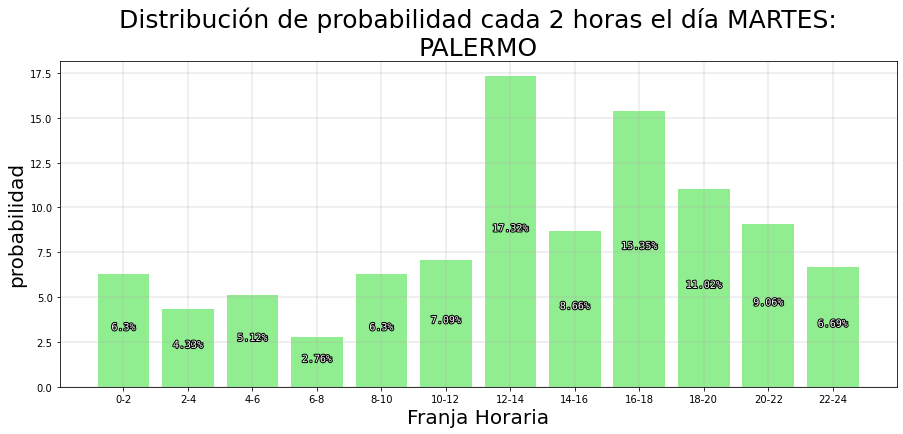

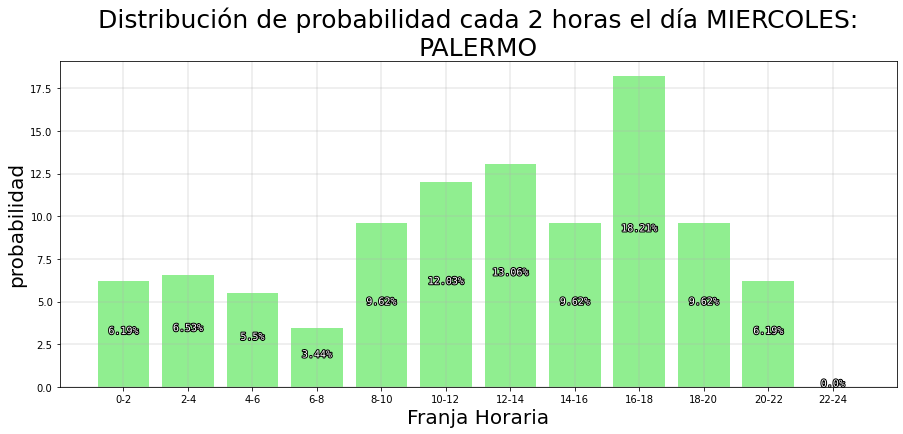

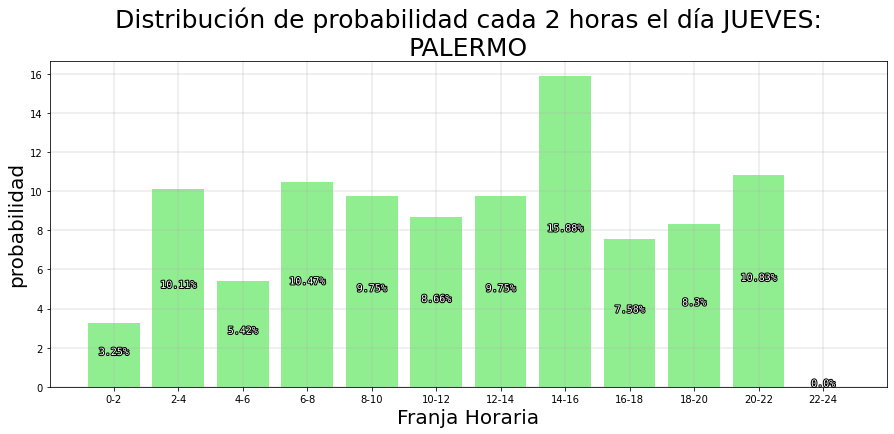

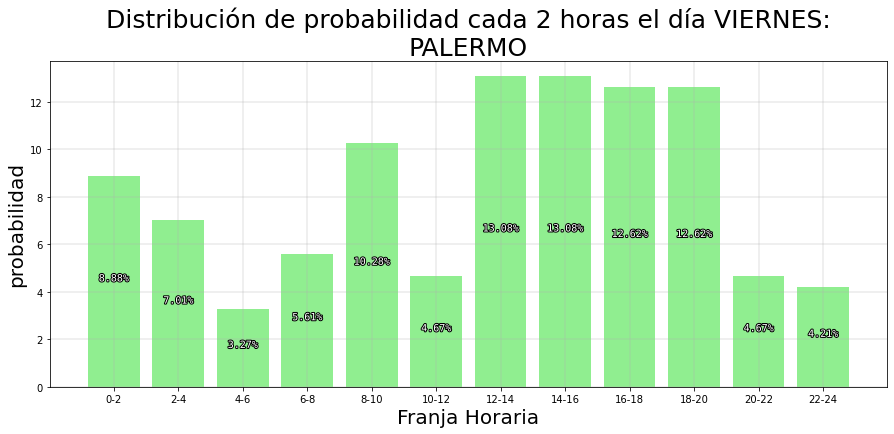

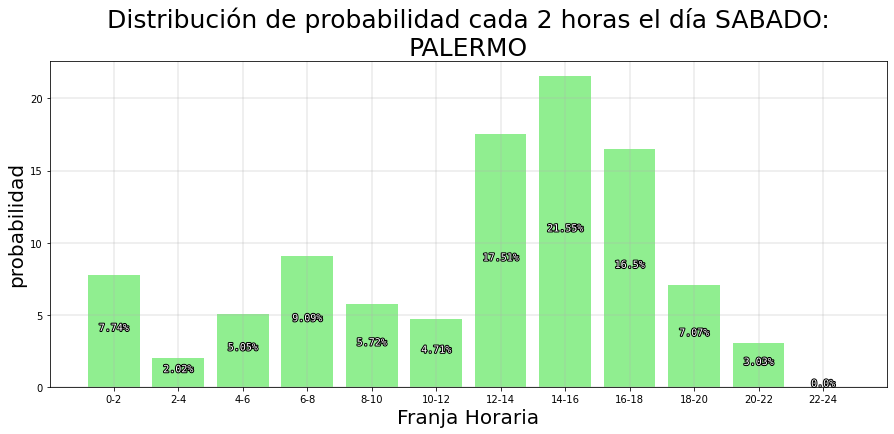

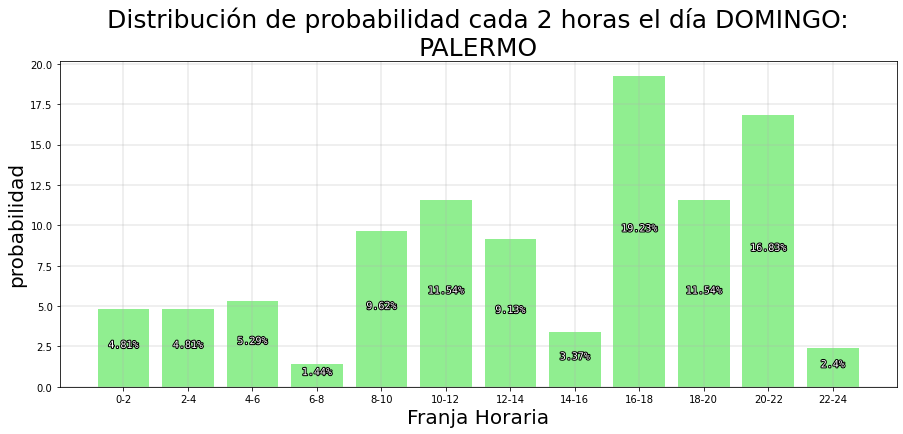

In [12]:
dias = ['lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo']

for dia_semana in dias :
    plotear_dia(barrio, dia_semana ,2)    

## pedir toda la data en un dataframe

In [13]:
def frecuencias_df(df=None,n_agregacion=1,con_semana=False): #dataframe, número de agregación horaria, agregarle columna con total semanal o no

    dias_semana = ['lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo']

    if n_agregacion == 1:
        data = pd.DataFrame()
        for i in dias_semana[0:]:
            data[i] = distribucion_por_dia(df, i)
            data[i].replace(np.nan, 0, inplace=True)
        #data.columns = dias_semana
        if con_semana == True:
            data['semana'] = distribucion_por_dia(df)
    
    else:
        dias = ['lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo']
        data = pd.DataFrame(agregador(distribucion_por_dia(df, dias[0]) , n_agregacion))
        for i in dias_semana[1:]:
            data[i] = agregador(distribucion_por_dia(df, i) , n_agregacion)
        data.columns = dias
        if con_semana == True:
            data['semana'] = agregador(distribucion_por_dia(df) , n_agregacion)
        
    return data

### formateo del dataframe

In [18]:
distribucion = frecuencias_df(barrio, 1, con_semana=True)
np.sum(distribucion, axis = 0) 

lunes        1.000000
martes       0.996063
miercoles    0.955326
jueves       0.960289
viernes      0.976636
sabado       0.989899
domingo      0.961538
semana       0.976518
dtype: float64

#  REVISAR PORQUE LOS NÚMEROS NO DAN!

In [23]:
def bar_formatter(df):
    return df.style.format(formatter='{:.3f}%').bar(color = 'lightgreen', vmax=distribucion.semana.max()*1.5,
                                                                  vmin = 0, 
                                                                  align = 'left',
                                                                  subset = 'semana')\
    .background_gradient(cmap = 'BuPu', subset = df.columns[0:-1],
                        low = 0, high = 4) 
    
bar_formatter(distribucion)

,lunes,martes,miercoles,jueves,viernes,sabado,domingo,semana
0,0.024%,0.055%,0.000%,0.018%,0.051%,0.051%,0.029%,0.032%
1,0.073%,0.008%,0.058%,0.014%,0.037%,0.027%,0.019%,0.033%
2,0.005%,0.024%,0.003%,0.000%,0.023%,0.000%,0.019%,0.010%
3,0.010%,0.020%,0.000%,0.000%,0.000%,0.000%,0.029%,0.007%
4,0.010%,0.020%,0.038%,0.032%,0.047%,0.010%,0.014%,0.025%
5,0.044%,0.031%,0.027%,0.069%,0.009%,0.010%,0.000%,0.028%
7,0.034%,0.024%,0.010%,0.014%,0.023%,0.040%,0.005%,0.022%
8,0.059%,0.031%,0.024%,0.051%,0.033%,0.020%,0.010%,0.032%
9,0.010%,0.031%,0.010%,0.054%,0.033%,0.071%,0.043%,0.037%
10,0.059%,0.047%,0.024%,0.047%,0.070%,0.030%,0.053%,0.045%


# Ahora, a repetir todo para la hora de llegada estimada!